In [1]:
import pandas as pd

import quandl
import my_secrets
quandl.ApiConfig.api_key = my_secrets.QUANDL_API_KEY

import random
import numpy as np

from scipy import stats



import altair as alt
if not alt.data_transformers.active == 'json':  # Check json isn't already active
    alt.data_transformers.enable('json')
alt.renderers.enable('notebook')



%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
IBM = quandl.get("EOD/IBM")
MSFT = quandl.get("EOD/MSFT")
Apple = quandl.get("EOD/AAPL")
Intel = quandl.get("EOD/INTC")

In [3]:
print('IBM =',IBM.shape)
print('MSFT =',MSFT.shape)
print('Apple =',Apple.shape)
print('Intel =',Intel.shape)

IBM = (1090, 12)
MSFT = (1090, 12)
Apple = (1090, 12)
Intel = (1090, 12)


In [4]:
df = [IBM , MSFT , Apple , Intel]
df_dict = {'IMB':IBM, 'MSFT':MSFT , 'Apple':Apple , 'Intel':Intel }

In [5]:
for dataset in df_dict:
    df_dict[dataset]['Gain'] = df_dict[dataset]['Close']-df_dict[dataset]['Open']

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


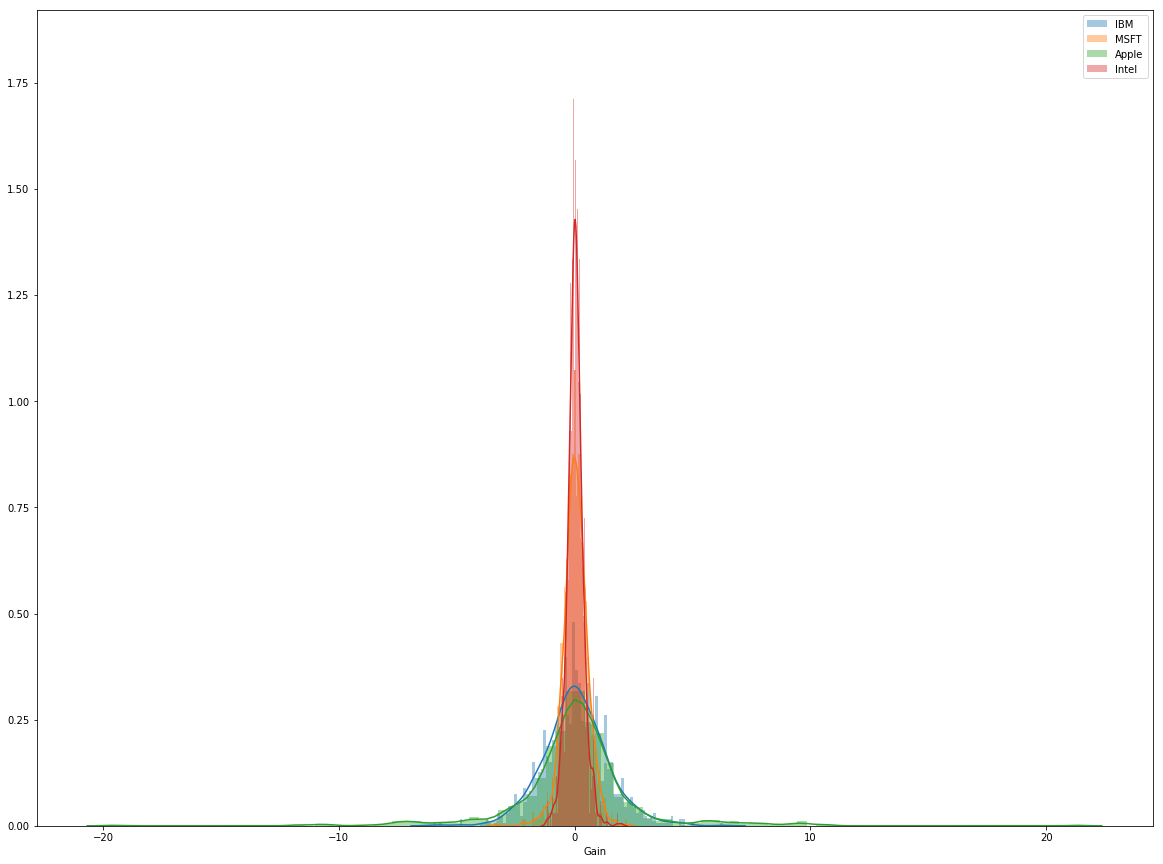

In [6]:
plt.figure(figsize=(20, 15))

sns.distplot(IBM['Gain'], hist=True,bins=100, label='IBM')
sns.distplot(MSFT['Gain'], hist=True,bins=100, label='MSFT')
sns.distplot(Apple['Gain'], hist=True,bins=100, label='Apple')
sns.distplot(Intel['Gain'], hist=True,bins=100, label='Intel')

plt.legend(loc='upper right')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


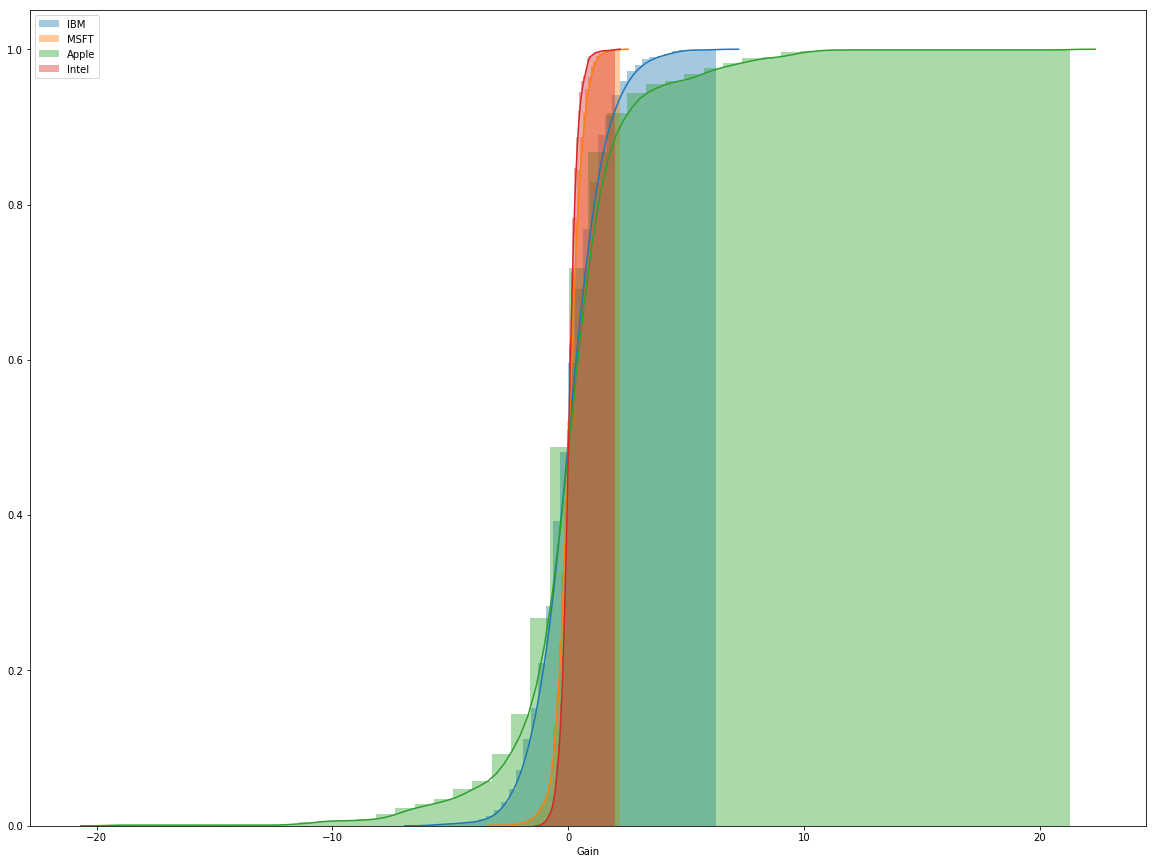

In [7]:
plt.figure(figsize=(20, 15))
sns.distplot(IBM['Gain'],
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True),
             label='IBM')
sns.distplot(MSFT['Gain'],
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True),
            label='MSFT')
sns.distplot(Apple['Gain'],
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True),
            label='Apple')
sns.distplot(Intel['Gain'],
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True),
            label='Intel')

plt.legend(loc='upper left')
plt.show()

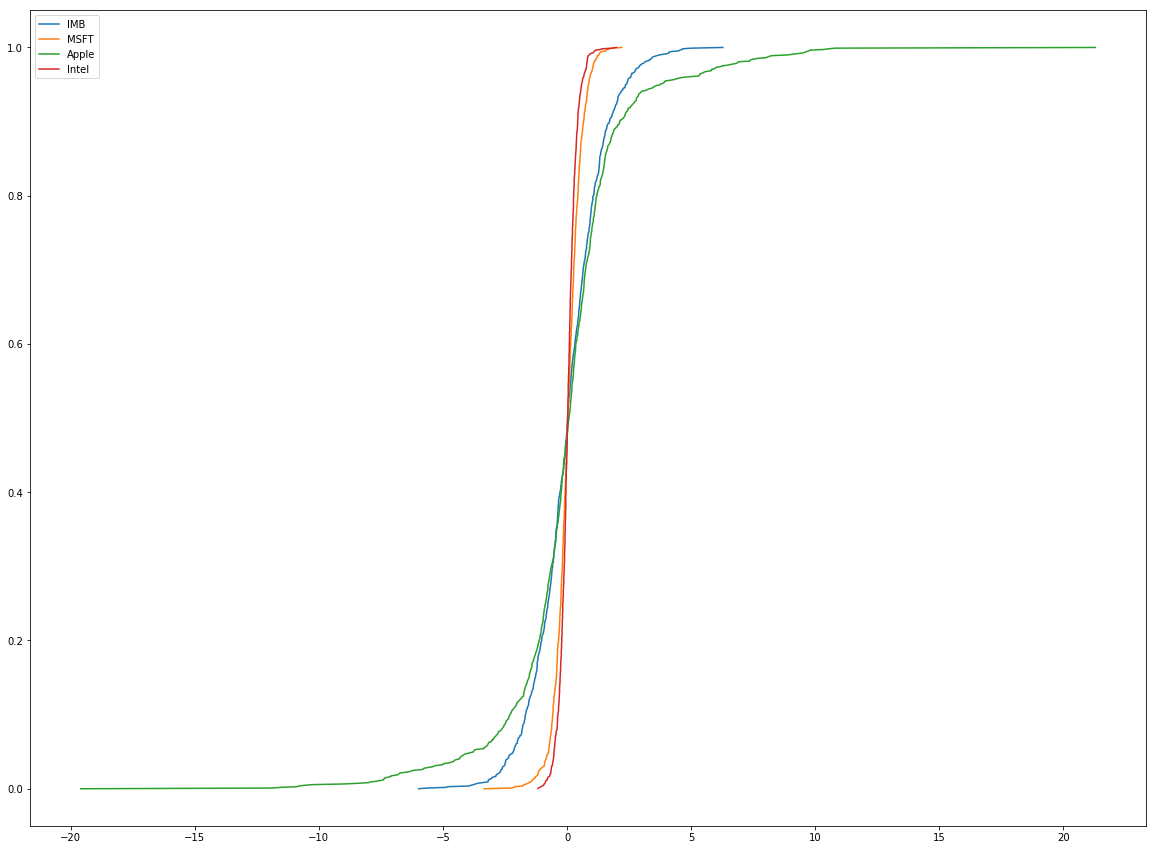

In [26]:
plt.figure(figsize=(20, 15))
for df in df_dict:
    x_values = df_dict[df]['Gain']
    data_sorted = np.sort(x_values)
    p = 1. * np.arange(len(x_values)) / (len(x_values) - 1)
    plt.plot(data_sorted, p, label=df)
    plt.legend(loc='upper left')

In [30]:
for df in df_dict:
    skew = stats.skew(df_dict[df]['Gain'])
    print(dataset)
    print("The skew is {}".format(skew))
    kurtosis = stats.kurtosis(df_dict[df]['Gain'])
    print("The kurtosis is {}".format(kurtosis))
    print()

Intel
The skew is 0.08826193725610085
The kurtosis is 1.3527369997163685

Intel
The skew is -0.42271616239640164
The kurtosis is 2.7714828010214347

Intel
The skew is 0.098740691975726
The kurtosis is 10.237542332525969

Intel
The skew is 0.3492571473899671
The kurtosis is 2.4501883619458864



## Z-scores - Normalization

In [ ]:
IBM.head()

In [ ]:
data = quandl.get_table('WIKI/PRICES', ticker = ['IBM','MSFT', 'AAPL','INTL'], 
                        qopts = { 'columns': ['ticker', 'date' , 'adj_close'] }, 
                        paginate=True)

In [ ]:
data.groupby("ticker")['adj_close'].mean()

In [ ]:
alt.Chart(data).mark_bar(opacity=0.4).encode(
    x=alt.X("adj_close", bin=alt.Bin(maxbins=50)),
    y=alt.Y('count()', stack=None),
    # column='ticker',
    color='ticker',
)

In [ ]:
data.columns

In [ ]:
prices = data.pivot(columns="ticker", index="date", values='adj_close')
z_scores = (prices - prices.mean())/prices.std()
z_scores.head()

In [ ]:
alt.Chart(z_scores.melt(value_name="z_score_adj_close")).mark_bar(opacity=0.4).encode(
    x=alt.X("z_score_adj_close", bin=alt.Bin(maxbins=30)),
    y=alt.Y('count()', stack=None),
    # column='ticker',
    color='ticker',
)